In [1]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pylab as plt
import seaborn as sns  
%matplotlib inline

# Train code

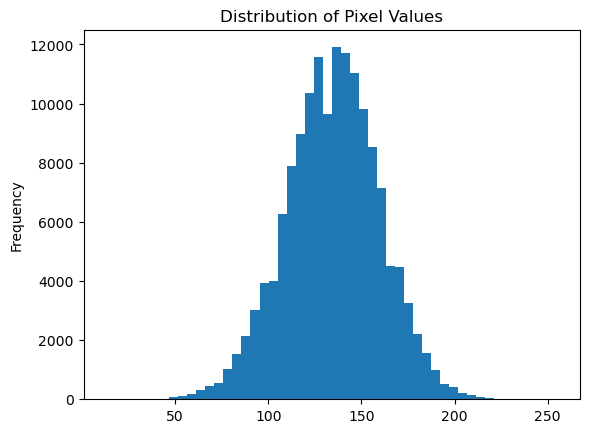

In [11]:
df = pd.read_csv('fungi_train.csv')
img_plt = plt.imread(df['Path'][0])
pd.Series(img_plt.flatten()).plot(kind='hist', 
                                  bins = 50, 
                                  title = 'Distribution of Pixel Values')
plt.show()
    

# display image


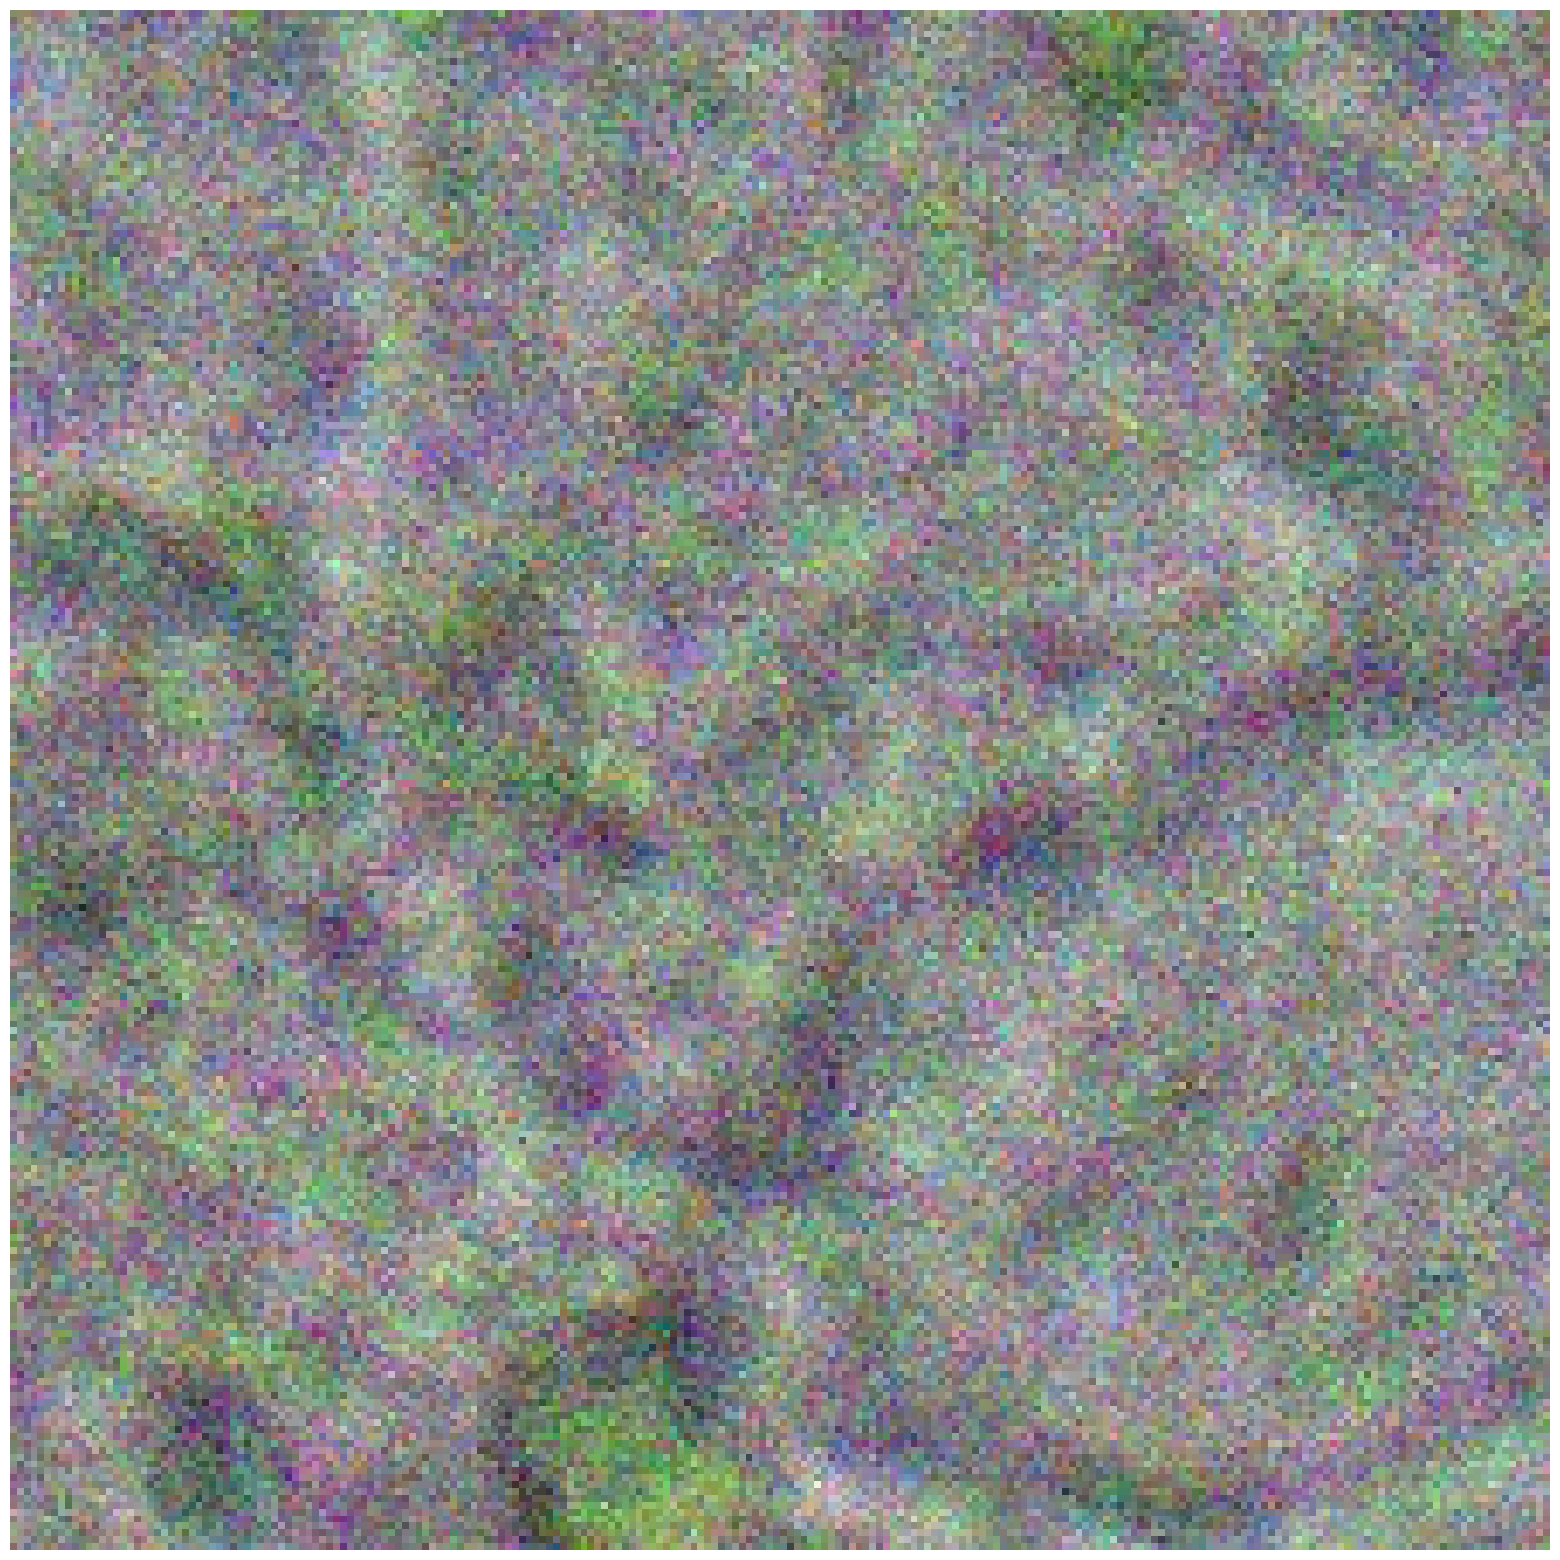

In [13]:
fig, ax = plt.subplots(figsize = (20,20))
ax.imshow(img_plt)
ax.axis('off')
plt.show()

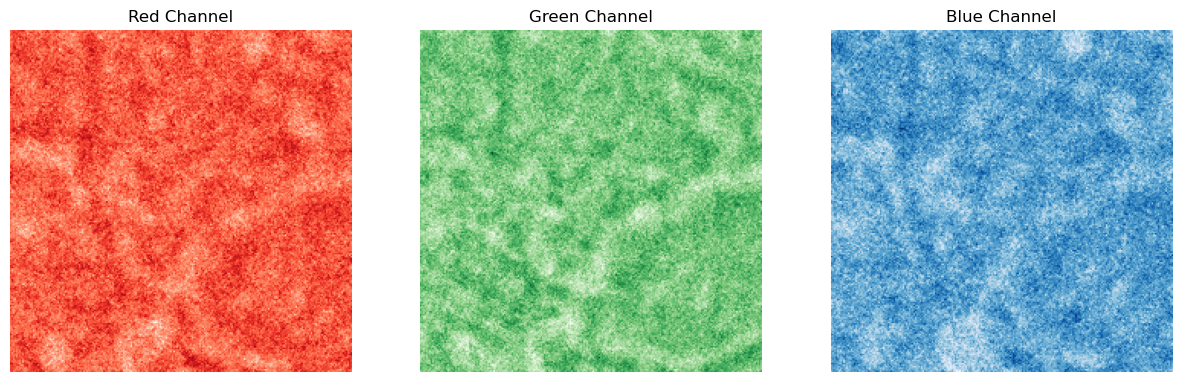

In [15]:
#Display RGB channels
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].imshow(img_plt[:, :, 0], cmap = 'Reds')
axs[1].imshow(img_plt[:, :, 1], cmap = 'Greens')
axs[2].imshow(img_plt[:, :, 2], cmap = 'Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')
plt.show()

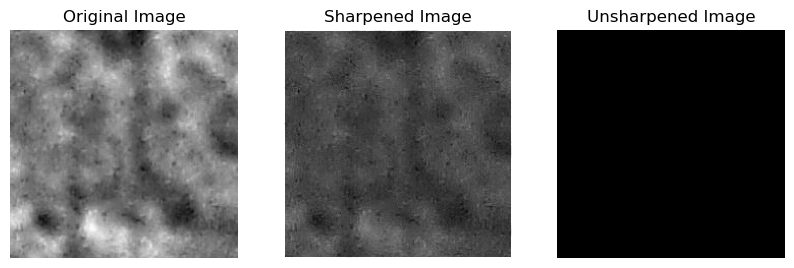

In [9]:
img_gray = np.dot(img_plt[..., :3], [0.2989, 0.5870, 0.1140])  # Convert to grayscale using weights

# Define a sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Define a unsharpening kernel
unsharpen_kernel = np.array([[1,1,1],
                             [1,1,1],
                             [1,1,1]])

# Function to apply a 2D convolution manually
def apply_convolution(image, kernel):
    """Applies a convolution operation to a grayscale image using a given kernel."""
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    
    # Pad the image to handle edges
    padded_image = np.pad(image, ((pad_h, pad_w)), mode='constant', constant_values=0)
    
    # Output array
    new_image = np.zeros_like(image)
    
    # Apply convolution
    for i in range(h):
        for j in range(w):
            new_image[i, j] = np.sum(padded_image[i:i+kh, j:j+kw] * kernel)
    
    return np.clip(new_image, 0, 255)  # Ensure pixel values are in the valid range

# Apply the convolution function
sharpened_img = apply_convolution(img_gray, sharpen_kernel)
unsharpened_img = apply_convolution(img_gray, unsharpen_kernel)

# Display the original and sharpened images
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(sharpened_img, cmap='gray')
axs[1].set_title("Sharpened Image")
axs[1].axis('off')

axs[2].imshow(unsharpened_img, cmap='gray')
axs[2].set_title("Unsharpened Image")
axs[2].axis('off')

plt.show()

In [ ]:
d = {}
for i in range(len(df['Path'])):
    img_plt = plt.imread(df['Path'][i]) 
    d[i] = img_plt 
    pd.Series(img_plt.flatten()).plot(kind='hist', 
                                  bins = 50, 
                                  title = 'Distribution of Pixel Values in Image '+ str(i) + 'ClassId: ' + str(df['ClassId'][i])
    plt.show()
